# Task 4 - Correlation of clusters with bulk RNA seq analysis of the clones
This notebook analyses the correlation of the different clusters with the bulk RNA seq analysis of the clones. This depends on the results of task 2 and 3 and a given matrix of the bulk RNA seq.

This notebook is based on the single-cell best practices book (https://github.com/theislab/single-cell-best-practices/). For further explanations of the applied methods please refer to above source.

# Gene set enrichment and pathway analysis 

### Prepare and explore the data

In [1]:
# import os
# os.environ['R_HOME'] = '/home/icb/till.richter/anaconda3/envs/scib/lib/R'

In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import anndata as ad
import random
import session_info
import os
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
import rpy2

In [4]:
from rpy2.robjects import r
import gdown
import anndata2ri
anndata2ri.activate()

In [5]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [6]:
%load_ext rpy2.ipython

In [7]:
!python -m rpy2.situation

rpy2 version:
3.5.1
Python version:
3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]
Looking for R's HOME:
    Environment variable R_HOME: /home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R
    Calling `R RHOME`: /home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R
    Environment variable R_LIBS_USER: ~/R/x86_64-conda-linux-gnu-library/4.0
R's additions to LD_LIBRARY_PATH:
/home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R/lib/:/home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R/lib/
R version:
    In the PATH: R version 4.0.5 (2021-03-31) -- "Shake and Throw"
    Loading R library from rpy2: OK
Additional directories to load R packages from:

C extension compilation:
  include:
  ['/home/icb/till.richter/anaconda3/envs/scib-pipeline-R4.0/lib/R/include']
  libraries:
  ['R', 'pcre2-8', 'lzma', 'bz2', 'z', 'rt', 'dl', 'm', 'iconv', 'icuuc', 'icui18n']
  library_dirs:
  ['/home/icb/till.richter/anaconda3/envs/

In [ ]:
%%R

library(SingleCellExperiment)
library(AUCell)

In [9]:
adata_read = sc.read_h5ad('../data/adata/processed_adata1.h5ad')
adata_read

AnnData object with n_obs × n_vars = 9190 × 10512
    obs: 'sample_id', 'sample_nr', 'donor', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'log_counts', 'n_counts', 'n_genes', 'size_factors', 'louvain_r0.5'
    var: 'mt', 'n_cells_by_counts-0-0-0', 'mean_counts-0-0-0', 'log1p_mean_counts-0-0-0', 'pct_dropout_by_counts-0-0-0', 'total_counts-0-0-0', 'log1p_total_counts-0-0-0', 'n_cells-0-0-0', 'n_cells_by_counts-1-0-0', 'mean_counts-1-0-0', 'log1p_mean_counts-1-0-0', 'pct_dropout_by_counts-1-0-0', 'total_counts-1-0-0', 'log1p_total_counts-1-0-0', 'n_cells-1-0-0', 'n_cells_by_counts-1-0', 'mean_counts-1-0', 'log1p_mean_counts-1-0', 'pct_dropout_by_counts-1-0', 'total_counts-1-0', 'log1p_total_counts-1-0', 'n_cells-1-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_m

In [10]:
adata_read.obs

sample_id sample_nr  donor  n_genes_by_counts  \
AAACCCAAGCTGCCTG-1-1  16992-2D         1  mouse               3113   
AAACCCAAGGTCATAA-1-1  16992-2D         1  mouse               2564   
AAACCCAAGTACCCTA-1-1  16992-2D         1  mouse               2819   
AAACCCACAAGGTCTT-1-1  16992-2D         1  mouse               1932   
AAACCCACAGGAGGTT-1-1  16992-2D         1  mouse               2930   
...                        ...       ...    ...                ...   
TTTGTTGGTCTAGGTT-1-1  16992-2D         1  mouse               2192   
TTTGTTGGTGGACTGA-1-1  16992-2D         1  mouse               2301   
TTTGTTGTCACAAGAA-1-1  16992-2D         1  mouse               1168   
TTTGTTGTCCTACGGG-1-1  16992-2D         1  mouse               1908   
TTTGTTGTCTTTGCTA-1-1  16992-2D         1  mouse               1819   

                      log1p_n_genes_by_counts  total_counts  \
AAACCCAAGCTGCCTG-1-1                 8.043663        9743.0   
AAACCCAAGGTCATAA-1-1                 7.849714        7168.0   
AAACCCAAGTACCCTA-1-1                 7.944492        8436.0   
AAACCCACAAGGTCTT-1-1                 7.566828        4536.0   
AAACCCACAGGAGGTT-1-1                 7.983099        8959.0   
...                                       ...           ...   
TTTGTTGGTCTAGGTT-1-1                 7.693026        5087.0   
TTTGTTGGTGGACTGA-1-1                 7.741534        4901.0   
TTTGTTGTCACAAGAA-1-1                 7.063904        2138.0   
TTTGTTGTCCTACGGG-1-1                 7.554335        4492.0   
TTTGTTGTCTTTGCTA-1-1                 7.506592        3934.0   

                      log1p_total_counts  pct_counts_in_top_50_genes  \
AAACCCAAGCTGCCTG-1-1            9.184407                   34.014164   
AAACCCAAGGTCATAA-1-1            8.877522                   27.734375   
AAACCCAAGTACCCTA-1-1            9.040382                   27.750119   
AAACCCACAAGGTCTT-1-1            8.420021                   26.410935   
AAACCCACAGGAGGTT-1-1            9.100526                   29.679652   
...                                  ...                         ...   
TTTGTTGGTCTAGGTT-1-1            8.534640                   25.122862   
TTTGTTGGTGGACTGA-1-1            8.497398                   22.444399   
TTTGTTGTCACAAGAA-1-1            7.668094                   31.571562   
TTTGTTGTCCTACGGG-1-1            8.410275                   31.923419   
TTTGTTGTCTTTGCTA-1-1            8.277666                   28.495170   

                      pct_counts_in_top_100_genes  \
AAACCCAAGCTGCCTG-1-1                    42.297034   
AAACCCAAGGTCATAA-1-1                    38.085938   
AAACCCAAGTACCCTA-1-1                    38.205311   
AAACCCACAAGGTCTT-1-1                    36.331570   
AAACCCACAGGAGGTT-1-1                    38.910593   
...                                           ...   
TTTGTTGGTCTAGGTT-1-1                    34.499705   
TTTGTTGGTGGACTGA-1-1                    31.034483   
TTTGTTGTCACAAGAA-1-1                    39.569691   
TTTGTTGTCCTACGGG-1-1                    41.874443   
TTTGTTGTCTTTGCTA-1-1                    38.332486   

                      pct_counts_in_top_200_genes  \
AAACCCAAGCTGCCTG-1-1                    51.021246   
AAACCCAAGGTCATAA-1-1                    48.660714   
AAACCCAAGTACCCTA-1-1                    47.878141   
AAACCCACAAGGTCTT-1-1                    47.266314   
AAACCCACAGGAGGTT-1-1                    48.018752   
...                                           ...   
TTTGTTGGTCTAGGTT-1-1                    44.584234   
TTTGTTGGTGGACTGA-1-1                    41.154866   
TTTGTTGTCACAAGAA-1-1                    49.906455   
TTTGTTGTCCTACGGG-1-1                    51.246661   
TTTGTTGTCTTTGCTA-1-1                    47.712252   

                      pct_counts_in_top_500_genes  total_counts_mt  \
AAACCCAAGCTGCCTG-1-1                    64.087037           1352.0   
AAACCCAAGGTCATAA-1-1                    63.825335            507.0   
AAACCCAAGTACCCTA-1-1                    62.849692            630.0   
AAAC

In [11]:
adata = adata_read.copy()

In [12]:
adata.layers['counts'] = adata.X

Let's keep a copy of the full dataset for the subsequent analyses before we subset on highly variable genes:

For simplicity, here we run a t-test using `rank_genes_groups` in `scanpy` to rank genes according to their test statistics for differential expression:

In [13]:
# find DE genes by t-test
adata.uns['log1p']["base"] = None
adata.obs['group'] = adata.obs['louvain_r0.5'].astype('string')
sc.tl.rank_genes_groups(adata, 'group', method='t-test', key_added = "t-test")

### Get the Pathway and map it to mm

In [14]:
import pyorthomap

In [15]:
from pyorthomap import FindOrthologs 
hs2mm = FindOrthologs(
          host = 'http://www.ensembl.org',
          mart = 'ENSEMBL_MART_ENSEMBL',
          from_dataset = 'hsapiens_gene_ensembl',
          to_dataset = 'mmusculus_gene_ensembl',
          from_filters = 'hgnc_symbol',
          from_values = ['TP53', 'TERT'],
          to_attributes = ['external_gene_name'],
          to_homolog_attribute = 'mmusculus_homolog_ensembl_gene',
          from_gene_id_name = 'human_ensembl_gene_id',
          to_gene_id_name = 'mouse_ensembl_gene_id'
    )
    
hs2mm.map()

  0%|          | 0/1 [00:00<?, ?it/s]

external_gene_name mouse_ensembl_gene_id human_ensembl_gene_id hgnc_symbol
0               Tert    ENSMUSG00000021611       ENSG00000164362        TERT
1              Trp53    ENSMUSG00000059552       ENSG00000141510        TP53

### Pathways from Clones
branched mesenchymal, firework, starlike2 for the 16992

ALBO, blownup, thick-like, tree-like for the 9591

In [16]:
all_pathways_mesenchymal = pd.read_excel('../data/2D-3D Overlapping markers_Highlighted.xlsx', sheet_name='Overlapping_Mesenchymal')

branched_mes2d_pathway = all_pathways_mesenchymal['Branched Mesenchymal 2D'].dropna().tolist()
branched_mes2d_pathway = [x.strip(' ') for x in branched_mes2d_pathway]

firework2d_pathway = all_pathways_mesenchymal['Firework 2D'].dropna().tolist()
firework2d_pathway = [x.strip(' ') for x in firework2d_pathway]

starlike2d_pathway = all_pathways_mesenchymal['Starlike2 2D'].dropna().tolist()
starlike2d_pathway = [x.strip(' ') for x in starlike2d_pathway]

all_pathways_mesenchymal

Branched Mesenchymal 2D Branched Mesenchymal 3D  Overlap  \
0                 Abcc1           2510009E07Rik        Abcc1   
1                 Acot1           4931406P16Rik        Acot1   
2                 Aldh3a1                 Abcc1      Aldh3a1   
3                 Basp1                   Abcc4        Basp1   
4                 Blvrb                   Abr           Cbr3   
..                      ...                     ...      ...   
355                     NaN                     NaN      NaN   
356                     NaN                     NaN      NaN   
357                     NaN                     NaN      NaN   
358                     NaN                     NaN      NaN   
359                     NaN                     NaN      NaN   

                                            Unnamed: 3        Firework 2D  \
0            ATP Binding Cassette Subfamily C Member 1  AA467197            
1                                                  NaN          Akr1c18     
2                                                  NaN          Angptl4     
3    Brain Abundant Membrane Attached Signal Protein 1  B3galnt1            
4                                                  NaN          Btc         
..                                                 ...                ...   
355                                                NaN                NaN   
356                                                NaN                NaN   
357                                                NaN                NaN   
358                                                NaN                NaN   
359                                                NaN                NaN   

           Firework 3D Overlap.1  \
0    2610528A11Rik       Akr1c18   
1    2810004N23Rik      B3galnt1   
2    2810013P06Rik          Cd53   
3            Acta2        Crabp1   
4    Adamtsl3             Crisp1   
..                 ...       ...   
355                NaN       NaN   
356                NaN       NaN   
357                NaN       NaN   
358                NaN       NaN   
359                NaN       NaN   

                                            Unnamed: 7       Starlike2 2D  \
0                                                  NaN          Acta2       
1                                                  NaN          Aspn        
2    the protein encoded by this gene is a member o...          Ptn         
3             Cellular Retinoic Acid Binding Protein 1  Serpinb9b           
4                                                  NaN          Aqp5        
..                                                 ...                ...   
355                                                NaN                NaN   
356                                                NaN                NaN   
357                                                NaN                NaN   
358                                                NaN                NaN   
359                                                NaN                NaN   

           Sarlike2 3D Overlap.2                               Unnamed: 11  
0    1700003F12Rik          Aqp5  Aquaporin 5 localized on apical membrane  
1    4930447F24Rik         Azin2                                       NaN  
2            Acsbg1        Bend5                                       NaN  
3            Adm           Cd302                                       NaN  
4            Aldoc         Cebpd                                       NaN  
..                 ...       ...                                       ...  
355          Xpa             NaN                                       NaN  
356          Yaf2            NaN                                       NaN  
357          Ypel3           NaN                                       NaN  
358          Zfp580          NaN                                       NaN  
359          Zfp622          NaN                                       NaN  

[360 rows x 12 columns]

In [17]:
all_pathways_mesenchymal = pd.read_excel('../data/2D-3D Overlapping markers_Highlighted.xlsx', sheet_name='Overlapping_Mesenchymal')

branched_mes3d_pathway = all_pathways_mesenchymal['Branched Mesenchymal 3D'].dropna().tolist()
branched_mes3d_pathway = [x.strip(' ') for x in branched_mes3d_pathway]

firework3d_pathway = all_pathways_mesenchymal['Firework 3D'].dropna().tolist()
firework3d_pathway = [x.strip(' ') for x in firework3d_pathway]

starlike3d_pathway = all_pathways_mesenchymal['Sarlike2 3D'].dropna().tolist()
starlike3d_pathway = [x.strip(' ') for x in starlike3d_pathway]

all_pathways_mesenchymal

Branched Mesenchymal 2D Branched Mesenchymal 3D  Overlap  \
0                 Abcc1           2510009E07Rik        Abcc1   
1                 Acot1           4931406P16Rik        Acot1   
2                 Aldh3a1                 Abcc1      Aldh3a1   
3                 Basp1                   Abcc4        Basp1   
4                 Blvrb                   Abr           Cbr3   
..                      ...                     ...      ...   
355                     NaN                     NaN      NaN   
356                     NaN                     NaN      NaN   
357                     NaN                     NaN      NaN   
358                     NaN                     NaN      NaN   
359                     NaN                     NaN      NaN   

                                            Unnamed: 3        Firework 2D  \
0            ATP Binding Cassette Subfamily C Member 1  AA467197            
1                                                  NaN          Akr1c18     
2                                                  NaN          Angptl4     
3    Brain Abundant Membrane Attached Signal Protein 1  B3galnt1            
4                                                  NaN          Btc         
..                                                 ...                ...   
355                                                NaN                NaN   
356                                                NaN                NaN   
357                                                NaN                NaN   
358                                                NaN                NaN   
359                                                NaN                NaN   

           Firework 3D Overlap.1  \
0    2610528A11Rik       Akr1c18   
1    2810004N23Rik      B3galnt1   
2    2810013P06Rik          Cd53   
3            Acta2        Crabp1   
4    Adamtsl3             Crisp1   
..                 ...       ...   
355                NaN       NaN   
356                NaN       NaN   
357                NaN       NaN   
358                NaN       NaN   
359                NaN       NaN   

                                            Unnamed: 7       Starlike2 2D  \
0                                                  NaN          Acta2       
1                                                  NaN          Aspn        
2    the protein encoded by this gene is a member o...          Ptn         
3             Cellular Retinoic Acid Binding Protein 1  Serpinb9b           
4                                                  NaN          Aqp5        
..                                                 ...                ...   
355                                                NaN                NaN   
356                                                NaN                NaN   
357                                                NaN                NaN   
358                                                NaN                NaN   
359                                                NaN                NaN   

           Sarlike2 3D Overlap.2                               Unnamed: 11  
0    1700003F12Rik          Aqp5  Aquaporin 5 localized on apical membrane  
1    4930447F24Rik         Azin2                                       NaN  
2            Acsbg1        Bend5                                       NaN  
3            Adm           Cd302                                       NaN  
4            Aldoc         Cebpd                                       NaN  
..                 ...       ...                                       ...  
355          Xpa             NaN                                       NaN  
356          Yaf2            NaN                                       NaN  
357          Ypel3           NaN                                       NaN  
358          Zfp580          NaN                                       NaN  
359          Zfp622          NaN                                       NaN  

[360 rows x 12 columns]

In [18]:
%R -i branched_mes3d_pathway
%R -i firework3d_pathway
%R -i starlike3d_pathway

In [19]:
%R -i branched_mes2d_pathway
%R -i firework2d_pathway
%R -i starlike2d_pathway

### Gene set enrichment for complex experimental designs using limma-fry and pseudo-bulks

#### Create pseudo-bulk samples and explore the data

In [20]:
def aggregate_and_filter(
    adata, 
    cell_identity=None, 
    sample_key=None, 
    condition_key='condition', 
    cell_identity_key='cell_identity',
    obs_to_keep=[], # which additional metadata to keep, e.g. gender, age, etc.
    replicates_per_sample=3,
    NUM_OF_CELL_PER_SAMPLE = 75
):
    
    adata_cell_pop = adata.copy()
    # subset adata to the given cell identity
    if cell_identity:
        print('Cell identity is true')
        adata_cell_pop = adata[adata.obs[cell_identity_key] == cell_identity].copy()
    # re-filter for this cell population
    # sc.pp.filter_genes(adata_cell_pop, min_cells=3) # leave this out for now
    
    if sample_key:
        print('We do have samples and/or patients')
        
        # if cells are from different samples and/or patients, make replicates per sample - condition - cell type
        # no use of condition_key. may need updates
        
        
        # check which donors to keep according to the number of cells specified with NUM_OF_CELL_PER_DONOR 
        size_by_donor = adata_cell_pop.obs.groupby([sample_key]).size()
        donors_to_drop = [donor for donor in size_by_donor.index if size_by_donor[donor] <= NUM_OF_CELL_PER_SAMPLE]
        df = pd.DataFrame(columns=[*adata_cell_pop.var_names, *obs_to_keep])

        adata_cell_pop.obs[sample_key] = adata_cell_pop.obs[sample_key].astype('category')
        donors=adata_cell_pop.obs[sample_key].cat.categories
        
        for i, donor in enumerate(donors):
            print(f'Processing donor {i+1} out of {len(donors)}...', end='\r')
            if donor not in donors_to_drop:
                adata_donor = adata_cell_pop[adata_cell_pop.obs[sample_key] == donor]
                # create replicates for each donor
                indices = list(adata_donor.obs_names)
                random.shuffle(indices)
                indices = np.array_split(np.array(indices), replicates_per_sample)
                for i, rep_idx in enumerate(indices):
                    adata_replicate = adata_donor[rep_idx]
                    # specify how to aggregate: sum gene expression for each gene for each donor and also keep the condition information
                    agg_dict = {gene: 'mean' for gene in adata_replicate.var_names}
                    for obs in obs_to_keep:
                        agg_dict[obs] = 'first'
                    # create a df with all genes, donor and condition info
                    df_donor = pd.DataFrame(adata_replicate.X)
                    df_donor.index = adata_replicate.obs_names
                    df_donor.columns = adata_replicate.var_names
                    df_donor = df_donor.join(adata_replicate.obs[obs_to_keep])
                    # aggregate
                    df_donor = df_donor.groupby(sample_key).agg(agg_dict)
                    df_donor[sample_key] = donor
                    df.loc[f'donor_{donor}_{dataset_name}'] = df_donor.loc[donor]
    else:
        print('We do not have samples and/or patients')
        # if no samples and/or patients, make replicates per condition-cell type
        
        size_by_donor = adata_cell_pop.obs.groupby([condition_key]).size()
        # print('Size by donor: ', size_by_donor)
        df = pd.DataFrame(columns=[*adata_cell_pop.var_names, *obs_to_keep])
        # print('Dataframe: ', df)
        adata_cell_pop.obs[condition_key] = adata_cell_pop.obs[condition_key].astype('category')
        # print('New adata cell pop: ', adata_cell_pop)
        donors=adata_cell_pop.obs[condition_key].cat.categories
        # print('Donors: ', donors)
        for i, donor in enumerate(donors):
            # print(f'Processing condition {i+1} out of {len(donors)}...', end='\r')
            adata_donor = adata_cell_pop[adata_cell_pop.obs[condition_key] == donor]
            # print('Adata donor: ', adata_donor)
            # create replicates for each donor
            indices = list(adata_donor.obs_names)
            # print('Indices: ', len(indices))
            random.shuffle(indices)
            indices = np.array_split(np.array(indices), replicates_per_sample)
            for i, rep_idx in enumerate(indices):
                adata_replicate = adata_donor[rep_idx]
                # print('Adata replicate: ', adata_replicate)
                if adata_replicate.shape[0] >= NUM_OF_CELL_PER_SAMPLE: # this enumerates mean 75 cells per replicate
                     # specify how to aggregate: sum gene expression for each gene for each donor and also keep the condition information
                    agg_dict = {gene: 'mean' for gene in adata_replicate.var_names}
                    # print('Length of agg dict: ', len(agg_dict))
                    for obs in obs_to_keep:
                        agg_dict[obs] = 'first'
                    # create a df with all genes, donor and condition info
                    # print('Dataframe of x: ', np.array(adata_replicate.X.todense()))
                    df_donor = pd.DataFrame(adata_replicate.X.todense())
                    # print('Putting this into a df, we get: ', df_donor.shape, df_donor)
                    df_donor.index = adata_replicate.obs_names
                    # print('Indices, this should still work: ', len(adata_replicate.obs_names))
                    # print('Columns, now this doesnt work anymore: ', len(adata_replicate.var_names))
                    # print('DF Donor: ', df_donor)
                    df_donor.columns = adata_replicate.var_names
                    df_donor = df_donor.join(adata_replicate.obs[obs_to_keep])
                    # aggregate
                    df_donor = df_donor.groupby(condition_key).agg(agg_dict)
                    df_donor[condition_key] = donor
                    df.loc[f'{cell_identity}_{donor}_{i}'] = df_donor.loc[donor]
                else:
                    pass
                
                    
        
    
        
    # create AnnData object from the df
    adata_cell_pop = sc.AnnData(df[adata_cell_pop.var_names], obs=df.drop(columns=adata_cell_pop.var_names))
    return adata_cell_pop

In [48]:
ads = []
metadata = adata.obs.columns.tolist()
ads.append(aggregate_and_filter(adata, 
                            condition_key = 'louvain_r0.5',
                            replicates_per_sample = 3, 
                            obs_to_keep = ['louvain_r0.5']))

We do not have samples and/or patients


In [22]:
pb_data = ad.concat(ads) 
pb_data

AnnData object with n_obs × n_vars = 9 × 10512
    obs: 'louvain_r0.5'

In [23]:
# Does PC1 captures a meaningful biological or technical fact?
pb_data.obs['lib_size'] = pb_data.X.sum(1)

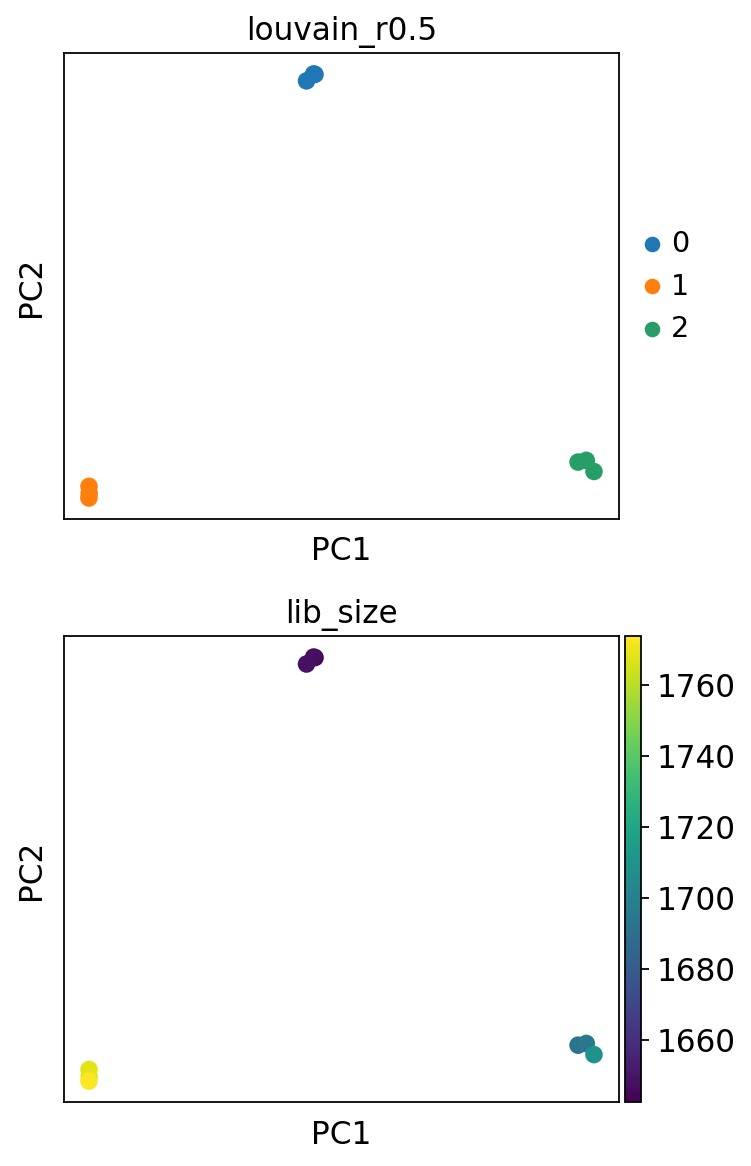

In [24]:
sc.pp.pca(pb_data)
sc.pl.pca(pb_data, color=pb_data.obs, ncols=1, size=250, save='/Bulk_PCA.pdf')
os.rename("figures/pca/Bulk_PCA.pdf", 
          "../results/task4/1_9591_TEBBO/Bulk_PCA.pdf")

In [25]:
# we will need to work with log-CPMs for fry
y = pb_data.X.T

In [26]:
%%R -i y
logCPM <- edgeR::cpm(y, log=TRUE, prior.count = 2)

In [27]:
%%R -o logCPM
logCPM = data.frame(logCPM)

In [28]:
pb_data.uns['logCPM_allgenes'] = logCPM.T

In [29]:
pb_data.obsm['logCPM_pca'] = sc.pp.pca(logCPM.T.to_numpy(), return_info = False)

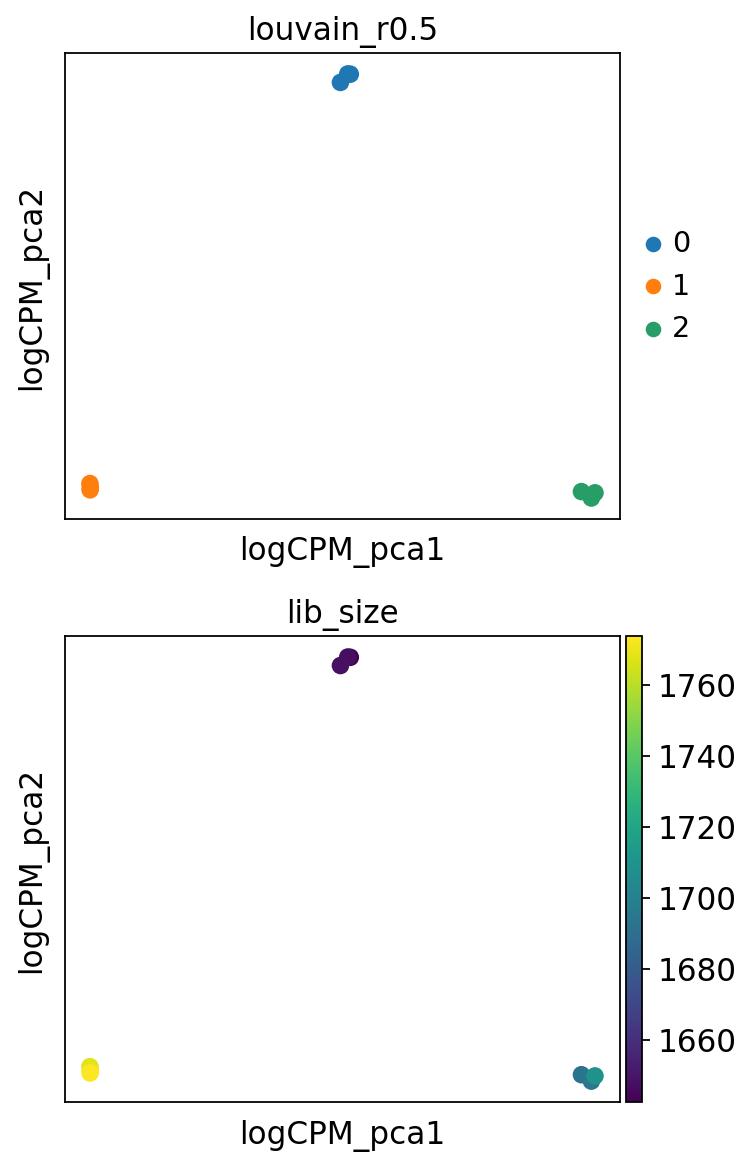

In [30]:
sc.pl.embedding(pb_data, 'logCPM_pca', color=pb_data.obs, ncols=1, size=250, save='')
os.rename("figures/logCPM_pca.pdf", 
          "../results/task4/1_9591_TEBBO/logCPM_PCA.pdf")

In [31]:
groups = pb_data.obs['louvain_r0.5'].astype('string')

In [32]:
%%R -i groups
groups <- as.factor(groups)
levels(groups)

[1] "0" "1" "2"


In [33]:
%%R -i groups
group <-  as.factor(gsub(" |\\+","_", groups))
# design <- model.matrix(~ 0 + group)
design <- model.matrix(~groups)
head(design)

     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    1    0    0
[3,]    1    0    0
[4,]    1    1    0
[5,]    1    1    0
[6,]    1    1    0


In [34]:
%%R
colnames(design)

[1] "(Intercept)" "groups1"     "groups2"    


In [35]:
%%R
print(design)

  (Intercept) groups1 groups2
1           1       0       0
2           1       0       0
3           1       0       0
4           1       1       0
5           1       1       0
6           1       1       0
7           1       0       1
8           1       0       1
9           1       0       1
attr(,"assign")
[1] 0 1 1
attr(,"contrasts")
attr(,"contrasts")$groups
[1] "contr.treatment"



Index the genes annotated in each pathway in our data as follows:

In [36]:
var_names = pb_data.var_names
idx = list(adata.obs_names)

In [37]:
%%R
# %R -i branched_mes2d_pathway
# %R -i firework2d_pathway
# %R -i starlike2d_pathway
# pathways <- list(albo2d_pathway, blownup2d_pathway, thicklike2d_pathway, treelike2d_pathway)
pathways <- list("branched_mesenchymal2d" = branched_mes2d_pathway, "firework2d" =  firework2d_pathway, "starlike2d" = starlike2d_pathway, "branched_mesenchymal3d" = branched_mes3d_pathway, "firework3d" =  firework3d_pathway, "starlike3d" = starlike3d_pathway)
pathways

$branched_mesenchymal2d
 [1] "Abcc1"    "Acot1"    "Aldh3a1"  "Basp1"    "Blvrb"    "Bmper"   
 [7] "Bst2"     "Camk2n1"  "Cbr3"     "Ccl2"     "Clec4d"   "Col18a1" 
[13] "Crlf1"    "Cxcl10"   "Cxcl14"   "Ddx60"    "Enpp2"    "Esd"     
[19] "Gbp7"     "Gclm"     "Gm20559"  "Gpr137b"  "Gsta2"    "Gsta3"   
[25] "H2-K1"    "Ifi35"    "Ifi44"    "Ifit1"    "Ifit3"    "Ifit3b"  
[31] "Iigp1"    "Irf7"     "Itih2"    "Kitl"     "Lgals3bp" "Megf9"   
[37] "Mgst2"    "Mndal"    "Ndn"      "Oasl2"    "Prss22"   "Psmb8"   
[43] "Rgs17"    "Rtp4"     "Samd9l"   "Slc7a11"  "Sqor"     "Srxn1"   
[49] "Stat1"    "Syt13"    "Trim30a"  "Txnrd1"   "Usp18"    "Xaf1"    
[55] "Zbp1"    

$firework2d
 [1] "AA467197" "Akr1c18"  "Angptl4"  "B3galnt1" "Btc"      "Cd53"    
 [7] "Crabp1"   "Crisp1"   "Cst6"     "Dcn"      "Dok2"     "Gap43"   
[13] "Gm29865"  "Il33"     "Jam2"     "Nrep"     "Oaf"      "Pycard"  
[19] "Qrfpr"    "Slc14a1"  "Sncg"     "Sox2"     "Stc1"     "Timp1"   
[25] "Trbc2"    "Upp1"  

In [38]:
%R -i idx

In [39]:
%%R -i var_names
rownames(logCPM) <- var_names
# albo2d_pathway
# blownup2d_pathway
# thicklike2d_pathway
# treelike2d_pathway
# pathways <- albo2d_pathway
idx <- limma::ids2indices(pathways, rownames(logCPM))

# idx <- limma::ids2indices(pathways, rownames(logCPM))  # no need for this?

As done in the `fgsea` method, let's remove gene sets with less than 15 genes

Now that we have set up the design and contrast matrices, and have indexed the genes in each pathway in our data, we can call `fry()` to test for enriched pathways in each of the contrasts we set above:

#### fry test for Stimulated vs Control

In [40]:
%%R
res0vs1 <- limma::fry(logCPM, index = idx, design = design, contrast = 2)
res0vs2 <- limma::fry(logCPM, index = idx, design = design, contrast = 3)
res0vs3 <- limma::fry(logCPM, index = idx, design = design, contrast = 4)
res0vs4 <- limma::fry(logCPM, index = idx, design = design, contrast = 5)
# res4 <- limma::fry(logCPM, index = idx, design = design, contrast = 5)

Let's print top few lines of fry's output

In [41]:
%%R
NUM_CHARS = 80
# trim long pathway names
rownames(res0vs1) <- sapply(rownames(res0vs1), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
print(head(res0vs1))
rownames(res0vs2) <- sapply(rownames(res0vs2), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
print(head(res0vs2))
rownames(res0vs3) <- sapply(rownames(res0vs3), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
print(head(res0vs3))
rownames(res0vs4) <- sapply(rownames(res0vs4), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
print(head(res0vs4))

                       NGenes Direction       PValue          FDR PValue.Mixed
starlike3d                290      Down 7.121004e-07 4.272602e-06 2.168378e-11
firework2d                 13      Down 3.984450e-06 1.195335e-05 1.144875e-07
branched_mesenchymal3d    203        Up 5.494101e-05 8.410338e-05 1.575695e-12
starlike2d                 23      Down 5.606892e-05 8.410338e-05 2.578163e-08
firework3d                 38      Down 4.825091e-03 5.790109e-03 1.632238e-08
branched_mesenchymal2d     31      Down 1.677397e-02 1.677397e-02 1.955553e-05
                          FDR.Mixed
starlike3d             6.505133e-11
firework2d             1.373850e-07
branched_mesenchymal3d 9.454168e-12
starlike2d             3.867244e-08
firework3d             3.264476e-08
branched_mesenchymal2d 1.955553e-05
                       NGenes Direction       PValue          FDR PValue.Mixed
branched_mesenchymal2d     31        Up 1.543085e-10 9.258507e-10 1.191170e-11
firework2d                 13      Do

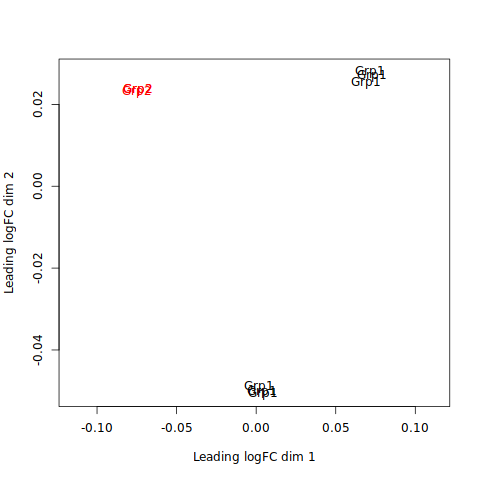

In [42]:
%%R
limma::plotMDS(logCPM,  col=c(rep("black",3), rep("red",3)), labels= c(rep("Grp1",3), rep("Grp2",3)))

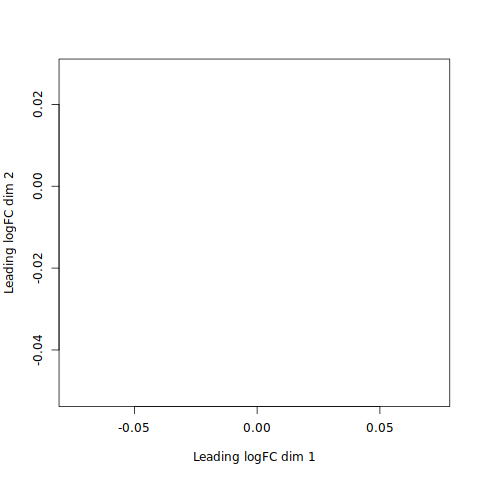

In [43]:
%%R
limma::plotMDS(logCPM, pch = 19, col = c(1:5)[groups])

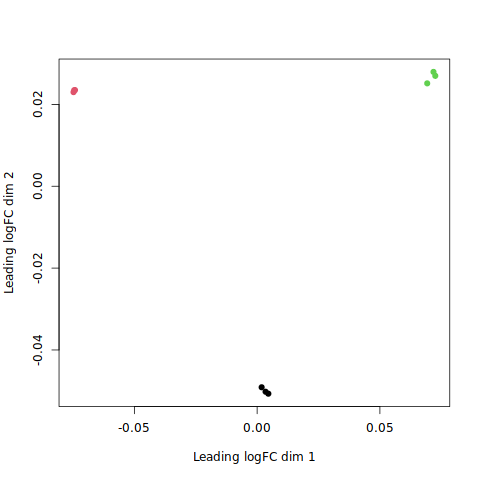

In [44]:
%%R
limma::plotMDS(logCPM, pch = 19, col = c(1:5)[as.factor(groups)])

In [45]:
%R -o res0vs1
%R -o res0vs2
%R -o res0vs3
%R -o res0vs4

In [46]:
res0vs3

NGenes Direction        PValue           FDR  \
branched_mesenchymal2d      31        Up  1.543085e-10  9.258507e-10   
firework2d                  13      Down  2.984150e-09  8.952451e-09   
branched_mesenchymal3d     203        Up  7.584682e-09  1.516936e-08   
firework3d                  38      Down  1.891665e-07  2.837498e-07   
starlike3d                 290      Down  5.238324e-06  6.285989e-06   
starlike2d                  23      Down  1.741753e-04  1.741753e-04   

                        PValue.Mixed     FDR.Mixed  
branched_mesenchymal2d  1.191170e-11  2.382340e-11  
firework2d              1.126080e-10  1.689119e-10  
branched_mesenchymal3d  7.894864e-12  2.382340e-11  
firework3d              3.682409e-10  4.418891e-10  
starlike3d              1.021749e-11  2.382340e-11  
starlike2d              4.762181e-09  4.762181e-09

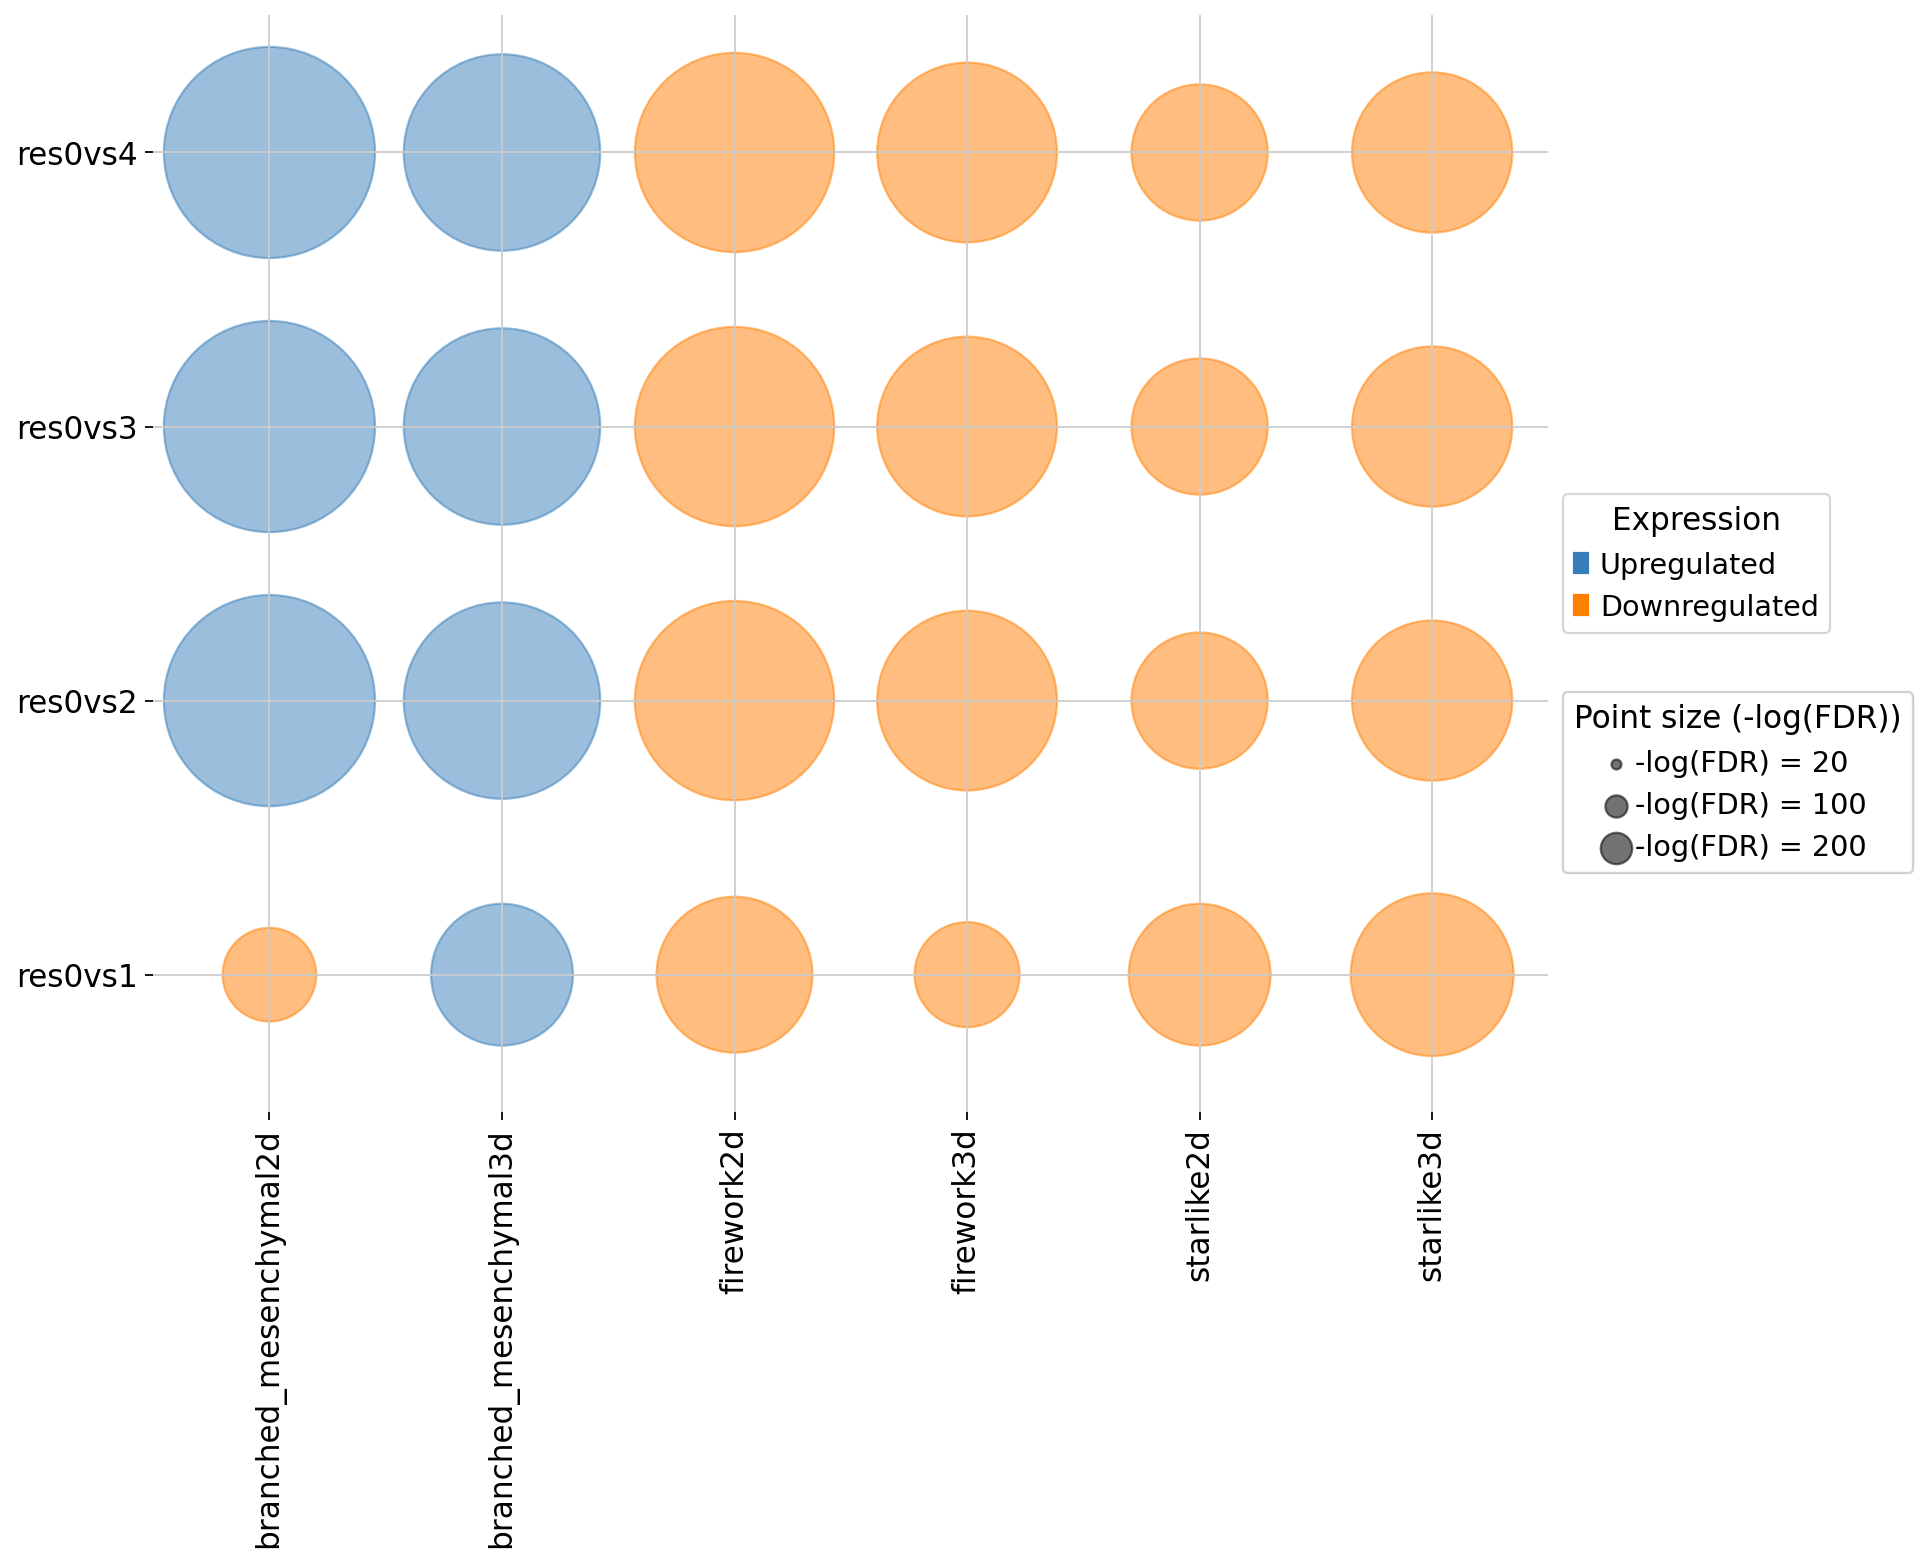

In [50]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10,10))
res0vs1.sort_index(axis=0, ascending=True, inplace=True)
res0vs2.sort_index(axis=0, ascending=True, inplace=True)
res0vs3.sort_index(axis=0, ascending=True, inplace=True)
res0vs4.sort_index(axis=0, ascending=True, inplace=True)


dfs = [res0vs1, res0vs2, res0vs3, res0vs4]
x = res0vs1.index.values  # all the same
y = ['res0vs1', 'res0vs2', 'res0vs3', 'res0vs4']
sizes=[]

for i, df in enumerate(dfs):
    c = df['Direction'].apply(lambda x: '#377eb8' if x == 'Up' else '#ff7f00').values
    size = -10 * np.log10(df['FDR'].values)
    sizes.append(size)
    ax.scatter(x, np.ones_like(x) * y[i], c=c, s=100 * size, alpha=0.5)

ax.set_yticks(y)
ax.set_yticklabels(y)
ax.set_xticks(x)
ax.set_xticklabels(x)

# Adjust axis limits
ax.set_xlim([-0.5, 5.5])
ax.set_ylim([-0.5, 3.5])

# Adjust subplot parameters to have less space between plots
# fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, hspace=0.1)
plt.xticks(rotation=90)  # rotate x-axis labels by 90 degrees
fig.tight_layout()  # adjust subplot parameters to minimize overlap

# Removing outer lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()

# Add first legend
red_patch = mpatches.Patch(color='#377eb8', label='Upregulated')
blue_patch = mpatches.Patch(color='#ff7f00', label='Downregulated')
legend1 = ax.legend(handles=[red_patch, blue_patch], loc='center left', bbox_to_anchor=(1, 0.5), title='Expression')

# Add second legend
sample_sizes = [20, 100, 200]
sample_labels = ['-log(FDR) = ' + str(size) for size in sample_sizes]
sample_scatters = [plt.scatter([], [], s=size, color='black', alpha=0.5) for size in sample_sizes]
legend2 = ax.legend(sample_scatters, sample_labels, loc='center left', bbox_to_anchor=(1, 0.3), title='Point size (-log(FDR))')

ax.add_artist(legend1)
ax.add_artist(legend2)
save_dir = '../results/task4/1_9591_TEBBO/1_9591_TEBBO_dotplot.pdf'
plt.savefig(save_dir, bbox_inches='tight')
plt.show()



In [49]:
res0vs1.to_excel('../results/task4/1_9591_TEBBO_fry_result_cluster0vs1.xlsx')
res0vs2.to_excel('../results/task4/1_9591_TEBBO_fry_result_cluster0vs2.xlsx')
res0vs3.to_excel('../results/task4/1_9591_TEBBO_fry_result_cluster0vs3.xlsx')
res0vs4.to_excel('../results/task4/1_9591_TEBBO_fry_result_cluster0vs4.xlsx')

In [ ]:
%%R
NUM_CHARS <- 50
ggdat <- res0vs1[1:4,]
ggdat$pathway <- sapply(rownames(ggdat), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
ggplot(ggdat, aes(x=reorder(pathway, -log10(FDR)), y = -log10(FDR))) +
    geom_bar(stat="identity", fill = "#9370DB") + coord_flip() +
    xlab('Pathway') + theme_minimal()

#### fry test for the comparison between two stimulated cell types

In [ ]:
%%R
ggdat <- res0vs1[1:4,]
ggdat$pathway <- sapply(rownames(ggdat), FUN=function(x) ifelse(nchar(x) > NUM_CHARS, substr(x,1, NUM_CHARS), x))
ggplot(ggdat, aes(x=reorder(pathway, -log10(FDR)), y = -log10(FDR))) +
    geom_bar(stat="identity", fill = "#8B008B") + coord_flip() +
    xlab('Pathway') + theme_minimal()

In [ ]:
%%R -i y
# keep <- edgeR::filterByExpr(y) # in real analysis, supply the desig matrix to the function to retain as more genes as possible
# y <- y[keep,]
logCPM <- edgeR::cpm(y, log=TRUE, prior.count = 2)
# logCPM

In [ ]:
%%R -o logCPM
logCPM = data.frame(logCPM)
# logCPM

In [ ]:
pb_data.uns['logCPM_FLE'] = logCPM.T # FLE for filter low exprs

In [ ]:
pb_data.obsm['logCPM_FLE_pca'] = sc.pp.pca(logCPM.T.to_numpy(), return_info = False)

In [ ]:
sc.pl.embedding(pb_data, 'logCPM_FLE_pca', color=pb_data.obs, ncols=1, size=250, save='')
os.rename("figures/logCPM_FLE_pca.pdf", 
          "../results/task4/1_9591_TEBBO/logCPM_FLE_PCA.pdf")

In [ ]:
sc.pl.dotplot(pb_data, color=pb_data.obs, groupby='bulk_labels', dendrogram=True)

### FGSEA

In [ ]:
sc.tl.rank_genes_groups(adata, 'group', method='t-test', key_added = "t-test")

In [ ]:
celltype_condition = '1' # 0, 1, 2, 3, 4

In [ ]:
adata.uns['t-test']['names'][celltype_condition]

In [ ]:
# extract ranked gene names and export to r
ranked_genes_ = adata.uns['t-test']['names'][celltype_condition]

In [ ]:
%%R -i ranked_genes_
ranked_genes = ranked_genes_
head(ranked_genes)

In [ ]:
# compute ranks and export to r
stats_ = adata.uns['t-test']['scores'][celltype_condition]

In [ ]:
%%R -i stats_
stats = stats_

In [ ]:
%%R
names(stats) = ranked_genes

In [ ]:
%R -o stats

In [ ]:
stats_df = pd.DataFrame(stats, index=ranked_genes_, columns=['Stats'])

In [ ]:
%%R 
fgseaRes <- fgsea(pathways = pathways, 
                  stats    = stats,
                  eps      = 0.0,
                  minSize  = 15,
                  maxSize  = 500)
fgseaRes

In [118]:
%%R
pathway <- fgseaRes[[1]]
pval <- fgseaRes[[2]]
padj <- fgseaRes[[3]]
log2err <- fgseaRes[[4]]
ES <- fgseaRes[[5]]
NES <- fgseaRes[[6]]
size <- fgseaRes[[7]]

In [119]:
%R -o pathway
%R -o pval
%R -o padj
%R -o log2err
%R -o ES
%R -o NES
%R -o size

In [120]:
df = pd.DataFrame({'Pathway': np.array(pathway), 'PVAL': np.array(pval), 'Adjusted PVAL': np.array(padj), 'log2 Error': np.array(log2err), 'ES': np.array(ES), 'NES': np.array(NES), 'Size': np.array(size)})
df.to_excel('../results/task4/1_9591_TEBBO/fgsea_results' + celltype_condition + '.xlsx')

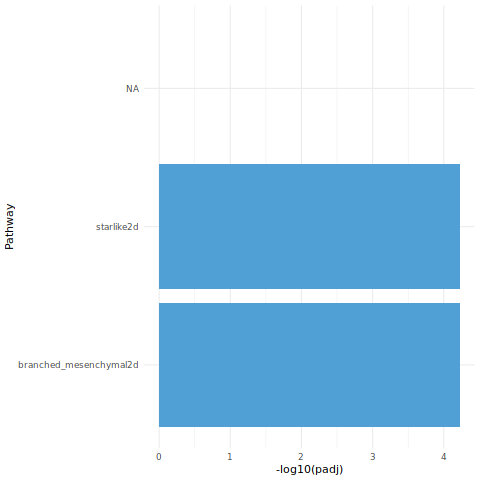

In [121]:
%%R
ggdat <- fgseaRes[order(fgseaRes$padj, decreasing=FALSE), ][1:20,]
ggplot(ggdat, aes(x=reorder(pathway, -log10(padj)), y = -log10(padj))) +
    geom_bar(stat="identity", fill = "#51A0D5") + coord_flip() +
    xlab('Pathway') + theme_minimal()

In [122]:
save_dir = '../results/task4/1_9591_TEBBO/fgsea_result_cluster' + celltype_condition + '.pdf'

In [123]:
%R -i save_dir

In [124]:
%%R 
ggsave(
  save_dir,
  plot = last_plot(),
  device = NULL,
  path = NULL,
  scale = 1,
  width = NA,
  height = NA,
  units = c("in", "cm", "mm", "px"),
  dpi = 300,
  limitsize = TRUE,
  bg = NULL,
)

Saving 6.67 x 6.67 in image


### Extra question
a) Side-by-side violin/boxplot for each score from the bulk signatures and provide a global p-value (e.g. using a Kruskal-Wallis test) for each

In [ ]:
pb_data.obsm['logCPM_FLE_pca']

array([[-2.8470322e-02,  1.2459904e+00, -8.7374877e-03,  4.9619679e-03,
         3.4309396e-01, -3.5855945e-03,  3.2463238e-02, -1.5176634e-02],
       [-3.0548070e-02,  1.2583541e+00, -9.8275486e-03,  1.1790461e-02,
        -1.6891091e-01,  2.9348826e-01, -6.6641262e-03, -1.6974999e-02],
       [-3.9470639e-02,  1.2646778e+00, -1.0396246e-02,  1.5486964e-02,
        -1.7116050e-01, -2.8920108e-01, -2.8431116e-02,  2.7237155e-02],
       [ 1.8995459e+00, -5.9599328e-01,  6.3628685e-03, -8.7868413e-03,
         2.1574439e-02,  2.8990252e-02, -6.6565484e-02,  3.0996606e-01],
       [ 1.9555960e+00, -6.0676777e-01,  1.0477210e-03, -2.2101451e-03,
        -3.9151393e-02, -2.0842502e-02,  3.0330250e-01, -9.4019003e-02],
       [ 1.9218775e+00, -6.3284642e-01,  7.0829871e-03, -9.0429643e-03,
         1.5975362e-02, -8.8148965e-03, -2.3860055e-01, -2.1083198e-01],
       [-1.8965596e+00, -5.9598285e-01,  9.0806872e-01, -2.1555650e-01,
        -1.4648138e-03, -3.8686203e-04,  2.9717989e-03, -4

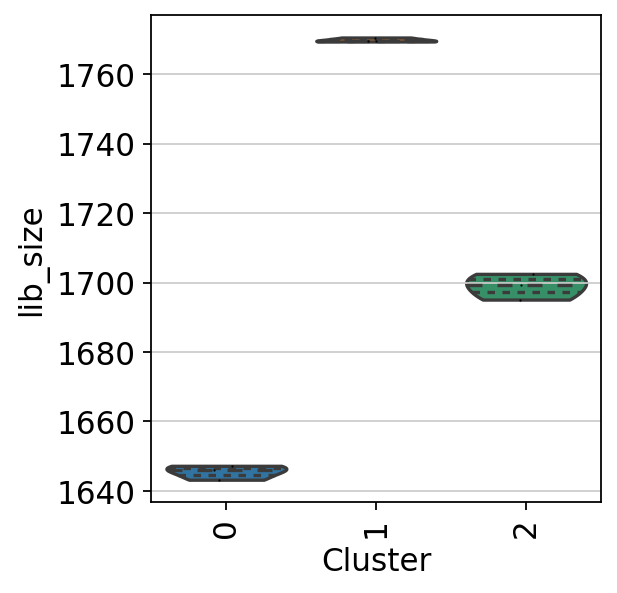

In [142]:
# LIMMA FRY
# pb_data.obs['logCPM_FLE_pca'] = pb_data.obsm['logCPM_FLE_pca']
sc.pl.violin(pb_data, 
             keys=['lib_size'],
             groupby='louvain_r0.5', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             # save='/1_9591_TEBBO/violin_fry.pdf'
            )
# os.rename("figures/violin/1_9591_TEBBO/violin_fry.pdf", 
#           "../results/extra_q/1_9591_TEBBO_violin_fry.pdf")

In [ ]:
# FGSEA
adata.obs['t-test'] = adata.uns['t-test']
sc.pl.violin(adata, 
             keys=['t-test'],
             groupby='Cluster', 
             rotation=90,
             xlabel='Cluster',
             inner="quartile",
             wspace = 0.4,
             # save='/1_9591_TEBBO/violin_fgsea.pdf'
            )
# os.rename("figures/violin/1_9591_TEBBO/violin_fgsea.pdf", 
#           "../results/extra_q/1_9591_TEBBO_violin_fgsea.pdf")

b) UMAPs for specific genes

Branched mesenchymal, firework, starlike2 for the 16992 & ALBO, blownup, thick-like, tree-like for the 9591

In [12]:
# overlap marker gene lists from Aristeidis Papargyriou
overlap_branched_mesenchymal = ['Abcc1', 'Acot1', 'Aldh3a1', 'Basp1', 'Cbr3', 'Clec4d', 'Col18a1', 'Cxcl14', 'Enpp2', 'Gbp7', 'Gclm', 'Gpr137b', 'Gsta2', 'Gsta3', 'Ifit3', 'Kitl', 'Megf9', 'Ndn', 'Slc7a11', 'Srxn1', 'Stat1', 'Syt13', 'Txnrd1']
overlap_firework = ['Akr1c18', 'B3galnt1', 'Cd53', 'Crabp1', 'Crisp1', 'Dok2', 'Gap43', 'Gm29865', 'Jam2', 'Nrep', 'Pycard', 'Slc14a1', 'Sncg']
overlap_starlike = ['Aqp5', 'Azin2', 'Bend5', 'Cd302', 'Cebpd', 'Ctla2a', 'Fkbp11', 'Gm41724', 'Il11ra1', 'Kdelr3', 'Lhfp', 'Rcn3', 'Renbp', 'Tmem159', 'Tpm2']

In [13]:
#Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,20))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

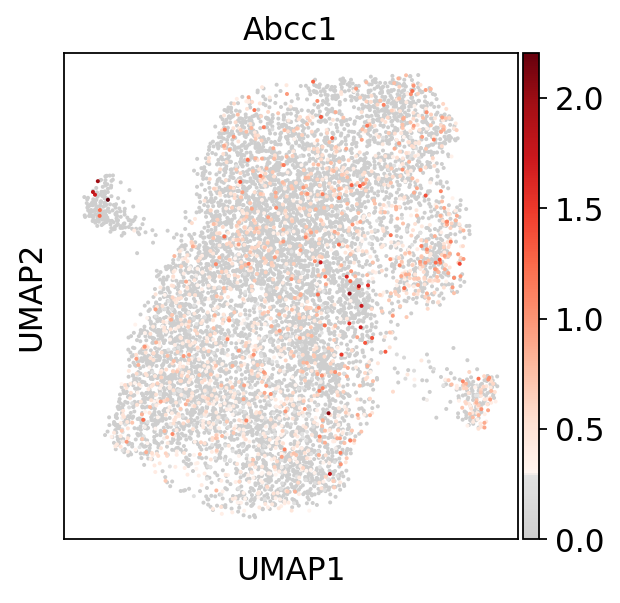

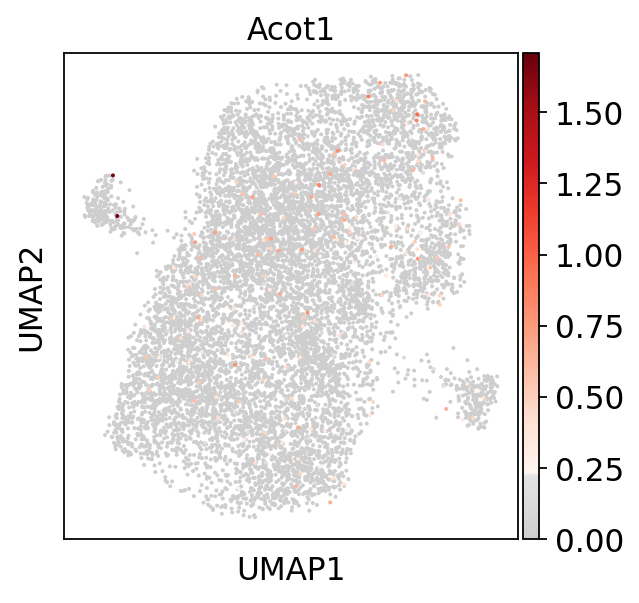

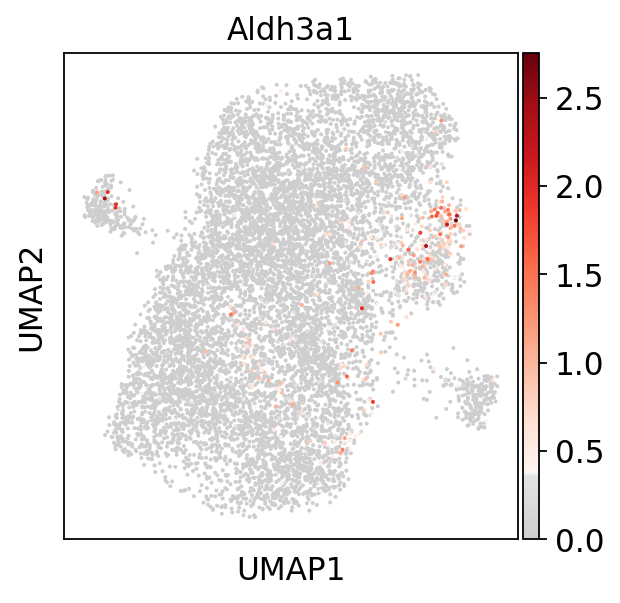

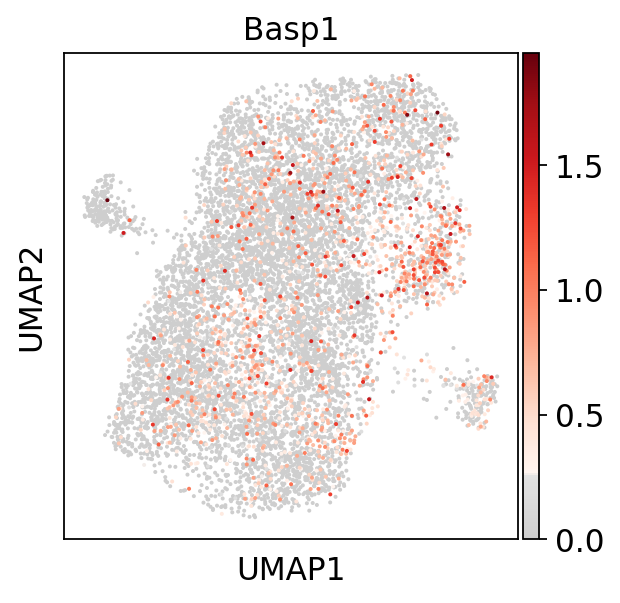

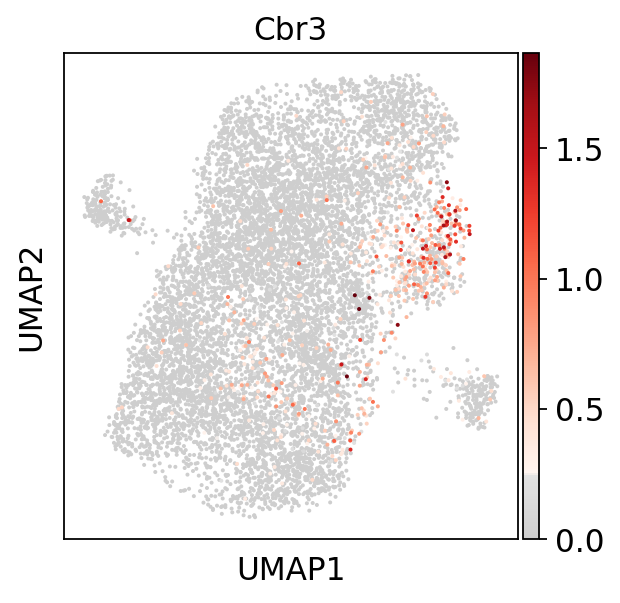

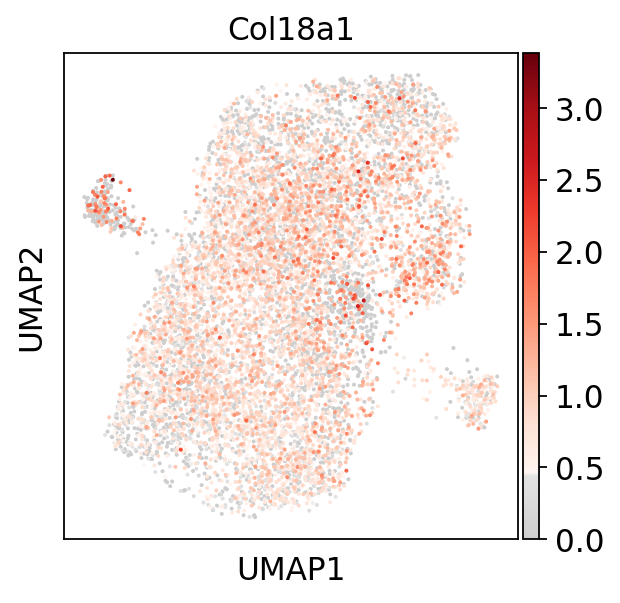

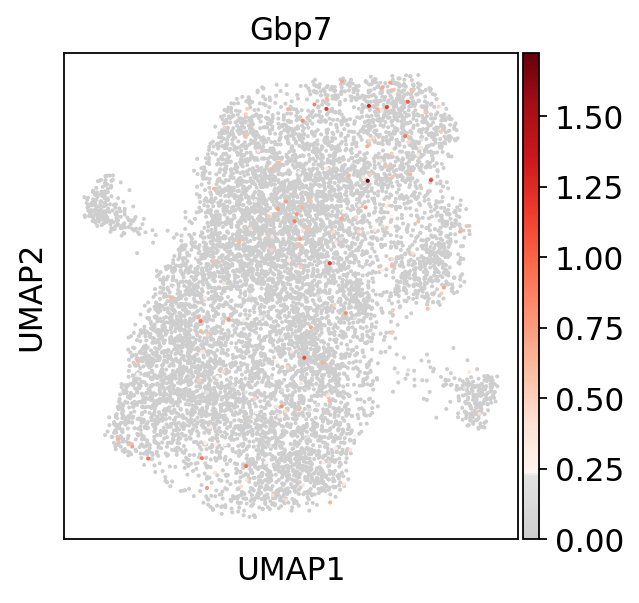

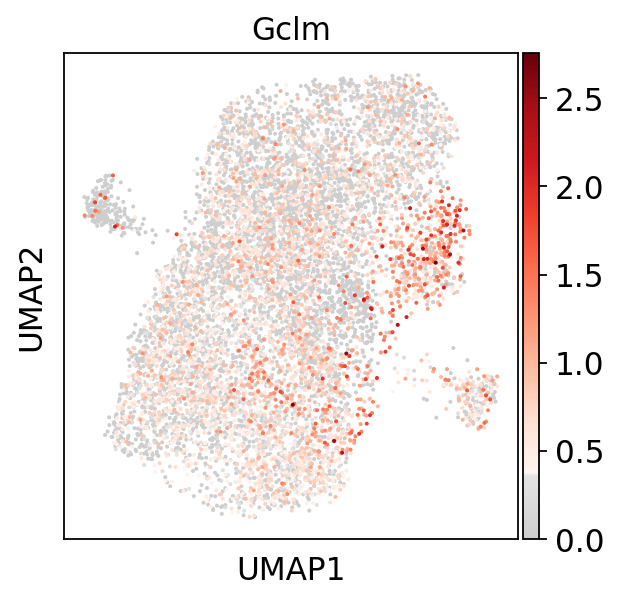

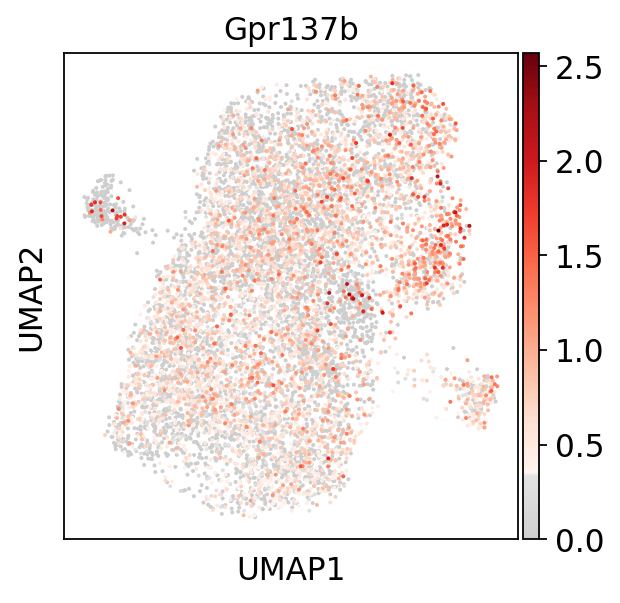

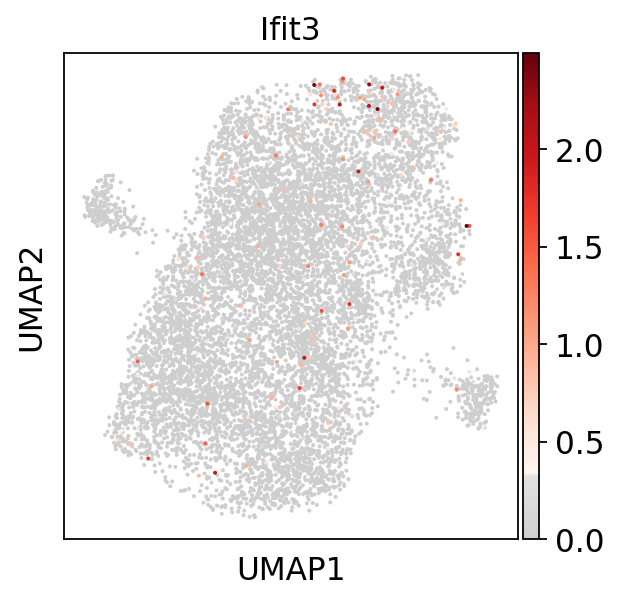

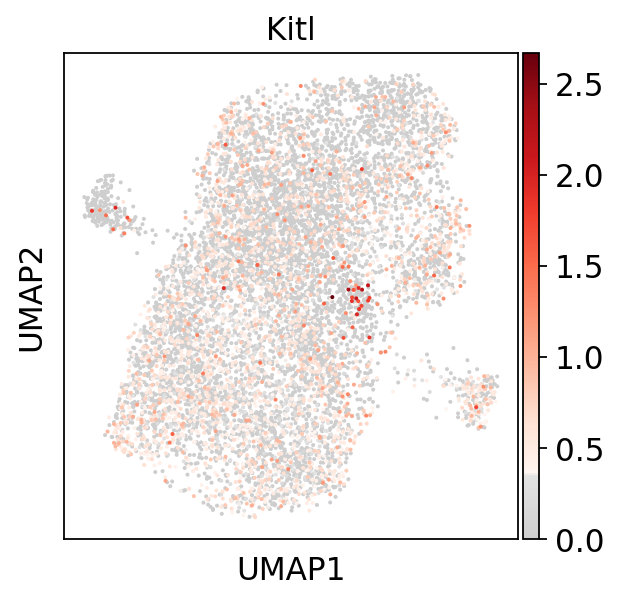

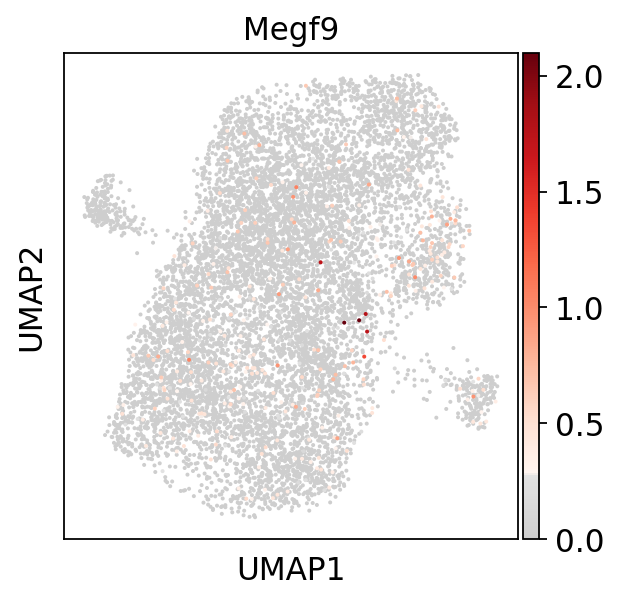

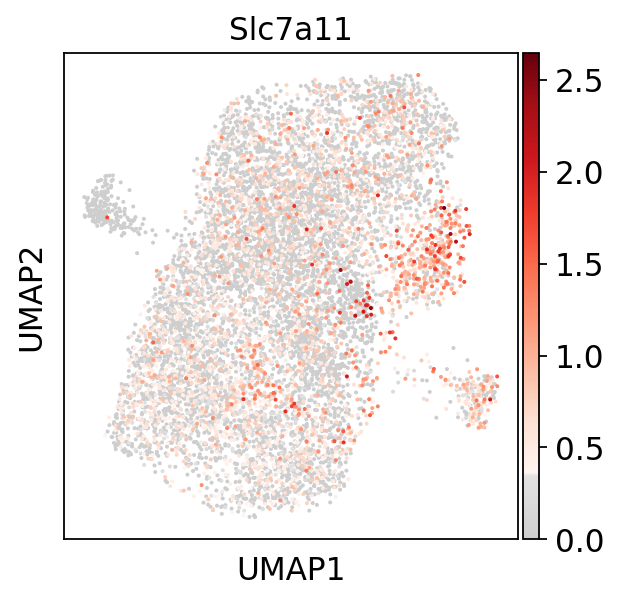

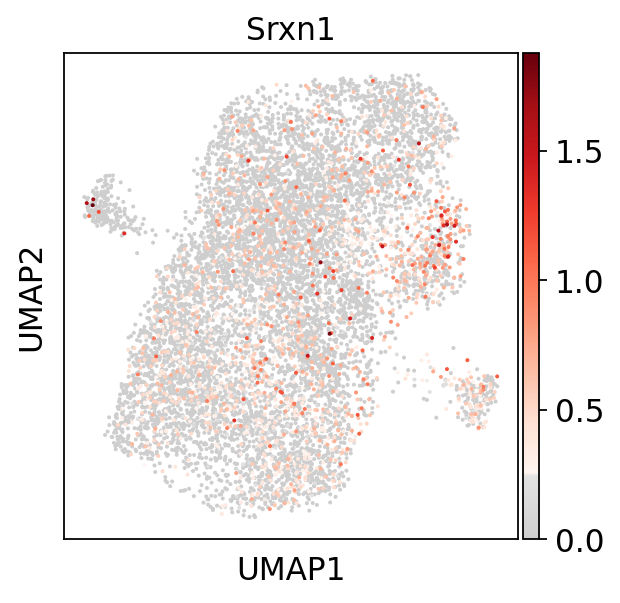

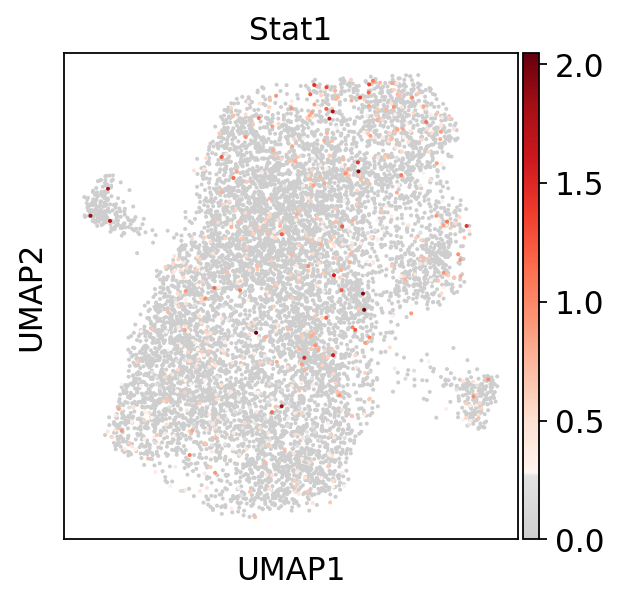

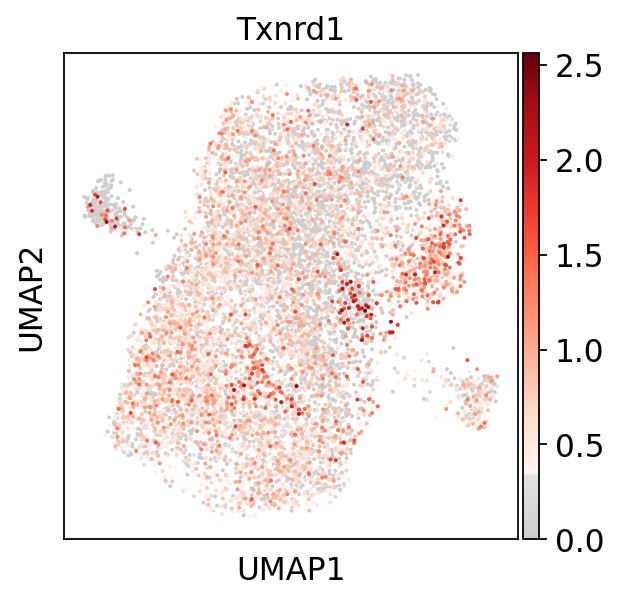

These genes are in the list but not in the adata:  ['Clec4d', 'Cxcl14', 'Enpp2', 'Gsta2', 'Gsta3', 'Ndn', 'Syt13']


In [15]:
# Branched Mesenchymal
not_fits = []
for gene in overlap_branched_mesenchymal: 
    if gene in adata.var_names:
        sc.pl.umap(adata, color=gene, use_raw=False, color_map=mymap, save='/1_9591_TEBBO/branched_mesenchymal_' + gene + '.pdf')
        os.rename("figures/umap/1_9591_TEBBO/branched_mesenchymal_" + gene + ".pdf", 
                  "../results/extra_q/1_9591_TEBBO/branched_mesenchymal_" + gene + ".pdf")
    else:
        not_fits.append(gene)
print('These genes are in the list but not in the adata: ', not_fits)

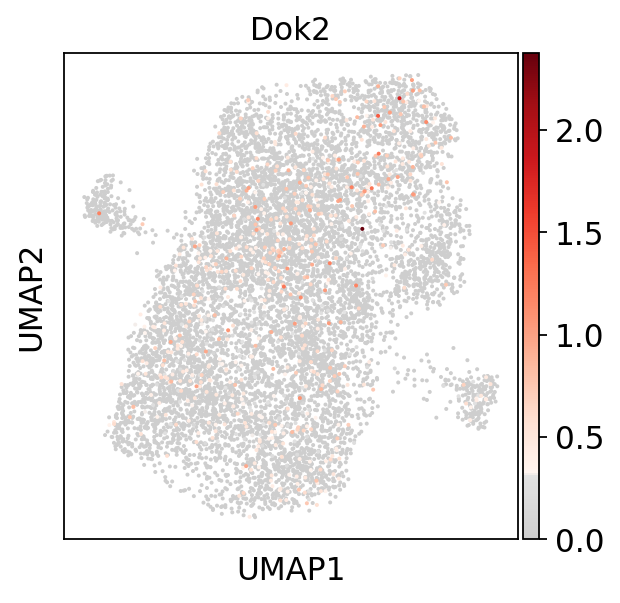

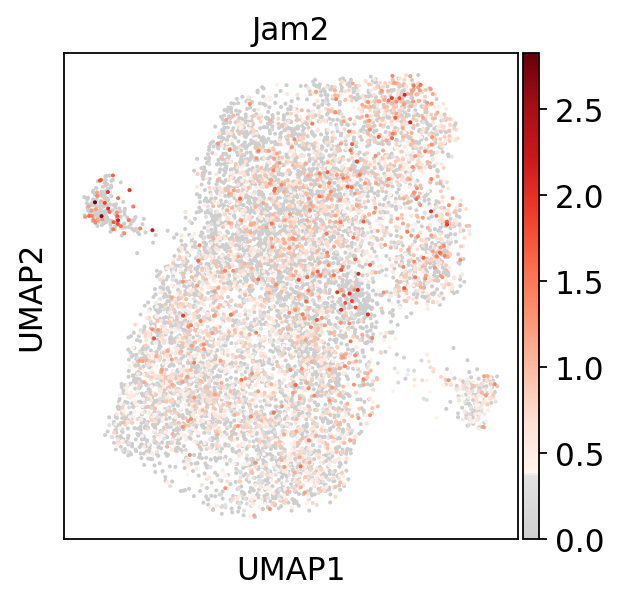

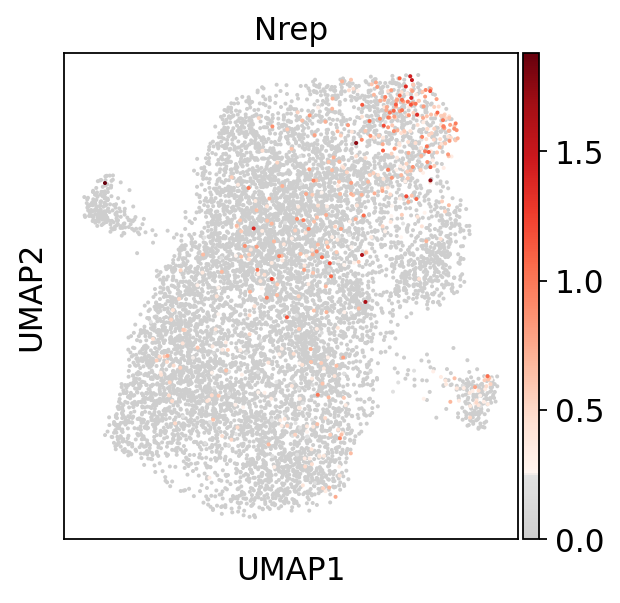

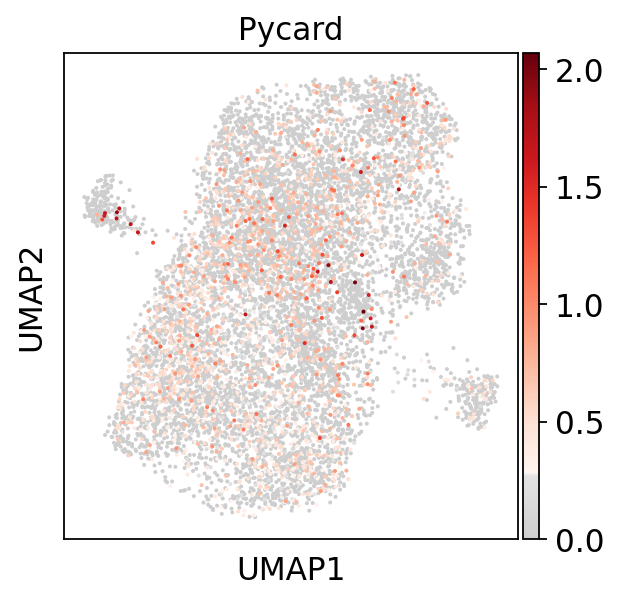

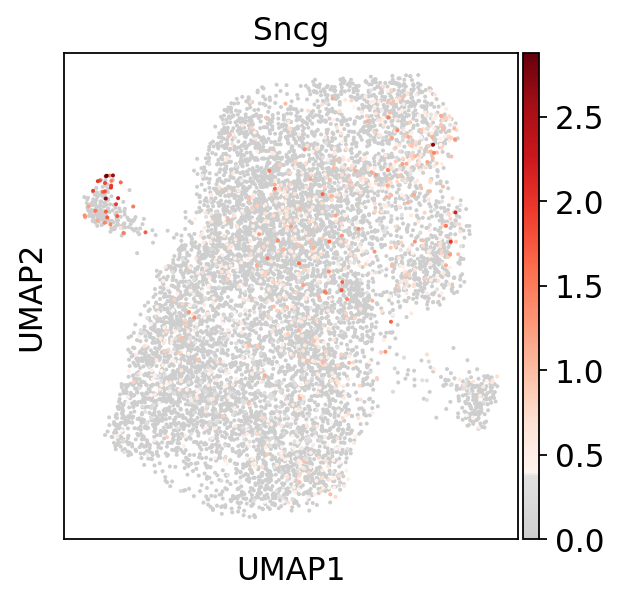

These genes are in the list but not in the adata:  ['Akr1c18', 'B3galnt1', 'Cd53', 'Crabp1', 'Crisp1', 'Gap43', 'Gm29865', 'Slc14a1']


In [16]:
# Firework
not_fits = []
for gene in overlap_firework:
    if gene in adata.var_names:
        sc.pl.umap(adata, color=gene, use_raw=False, color_map=mymap, save='/1_9591_TEBBO/firework_' + gene + '.pdf')
        os.rename("figures/umap/1_9591_TEBBO/firework_" + gene + ".pdf", 
                  "../results/extra_q/1_9591_TEBBO/firework_" + gene + ".pdf")
    else:
        not_fits.append(gene)
print('These genes are in the list but not in the adata: ', not_fits)

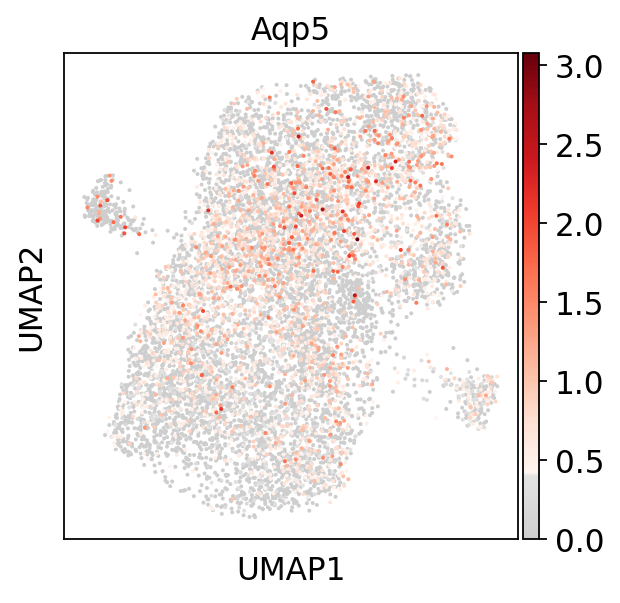

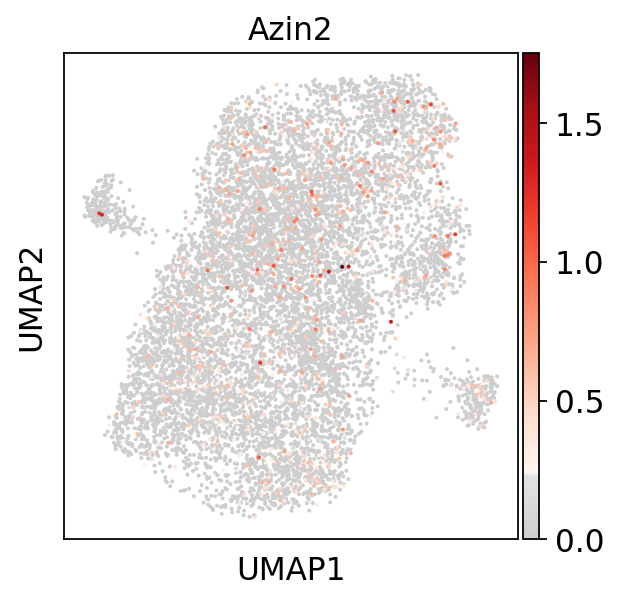

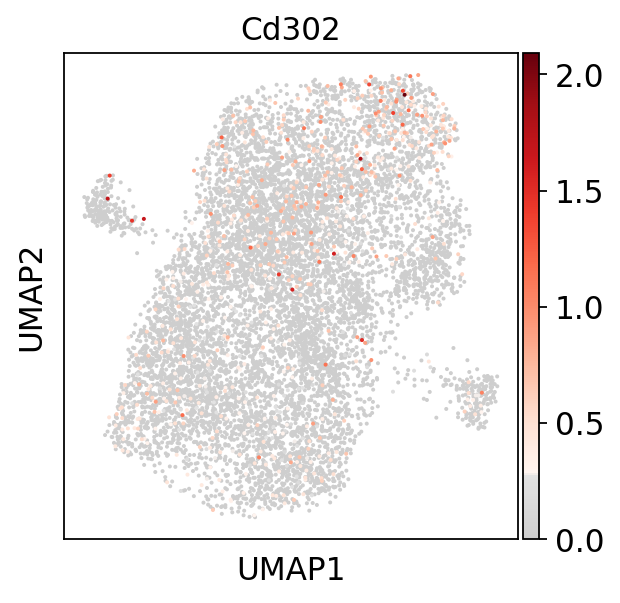

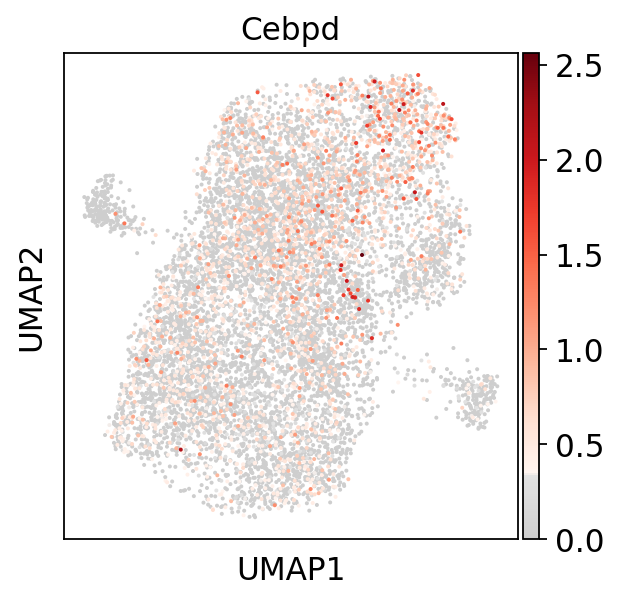

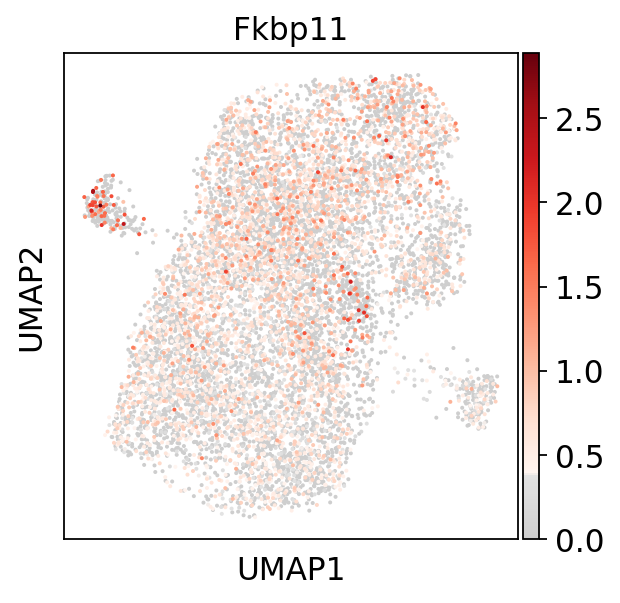

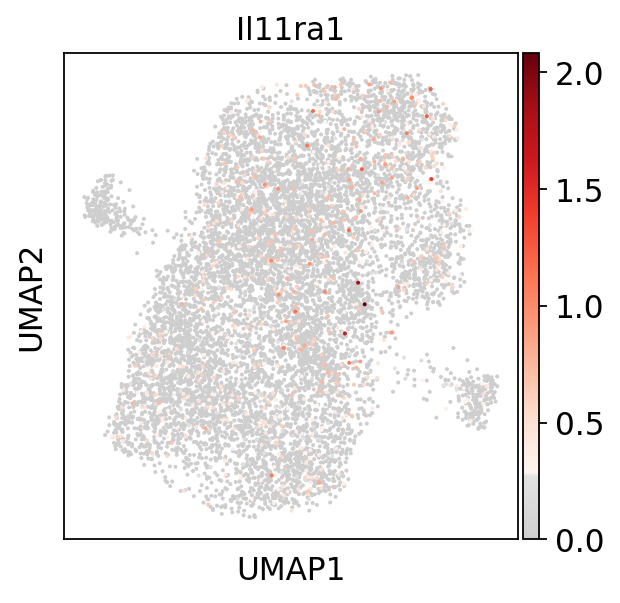

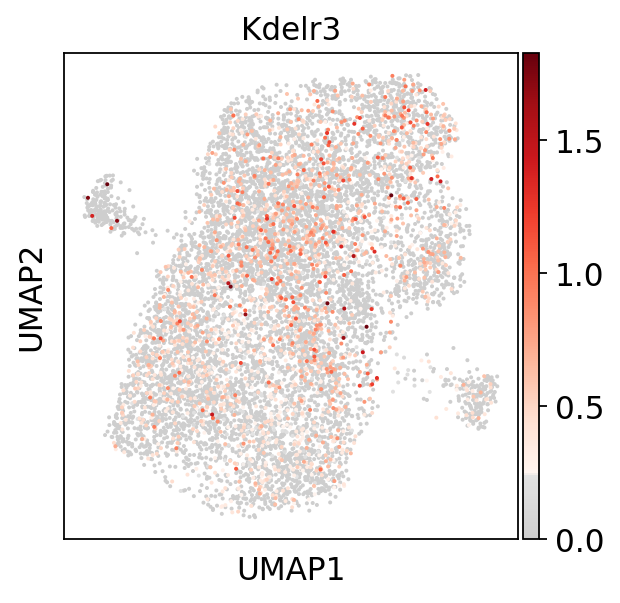

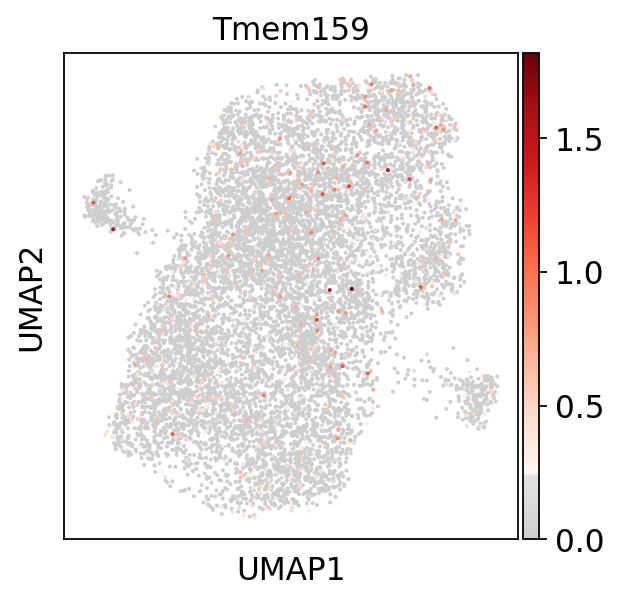

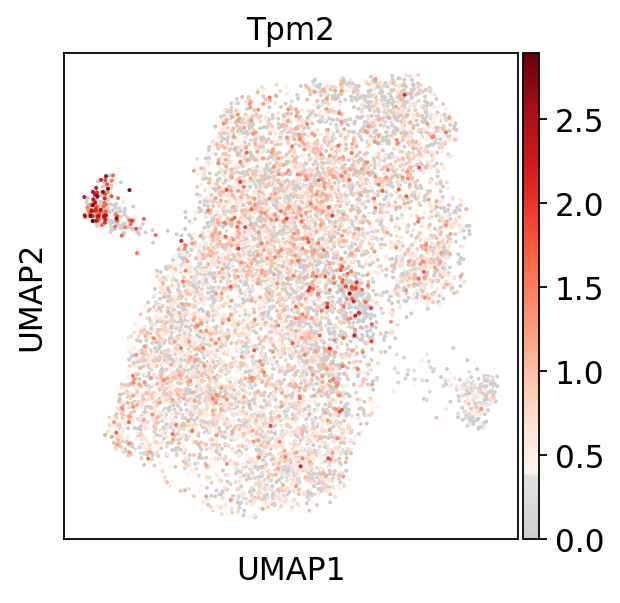

These genes are in the list but not in the adata:  ['Bend5', 'Ctla2a', 'Gm41724', 'Lhfp', 'Rcn3', 'Renbp']


In [17]:
# Starlike
not_fits = []
for gene in overlap_starlike: 
    if gene in adata.var_names:
        sc.pl.umap(adata, color=gene, use_raw=False, color_map=mymap, save='/1_9591_TEBBO/starlike_' + gene + '.pdf')
        os.rename("figures/umap/1_9591_TEBBO/starlike_" + gene + ".pdf", 
                  "../results/extra_q/1_9591_TEBBO/starlike_" + gene + ".pdf")
    else:
        not_fits.append(gene)
print('These genes are in the list but not in the adata: ', not_fits)

In [18]:
del adata